In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# Any results you write to the current directory are saved as output.

In [34]:
#standard useful data processing imports
import random
import numpy as np
import pandas as pd
#visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
#Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#keras imports
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [35]:
dataset=pd.read_csv('../input/devanagari-character-set/data.csv')

In [36]:
print(dataset.head())

   pixel_0000  pixel_0001  pixel_0002  pixel_0003  pixel_0004  pixel_0005  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   pixel_0006  pixel_0007  pixel_0008  pixel_0009  ...  pixel_1015  \
0           0           0           0           0  ...           0   
1           0           0           0           0  ...           0   
2           0           0           0           0  ...           0   
3           0           0           0           0  ...           0   
4           0           0           0           0  ...           0   

   pixel_1016  pixel_1017  pixel_1018  pixel_1019  pixel_1020  pixel_1021  \
0           0           0           0  

In [37]:
dataset.shape

(92000, 1025)

In [38]:
df=dataset['character'].value_counts()
print(type(df))

<class 'pandas.core.series.Series'>


In [39]:
x=dataset.values[:,:-1]/255.0
y=dataset['character'].values
del dataset
n_classes=46

In [40]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


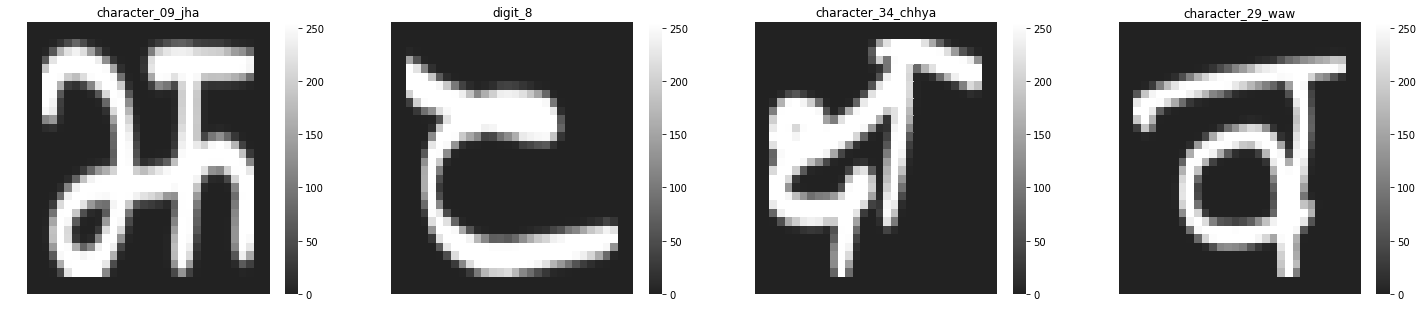

In [41]:
img_width_cols=32
img_height_rows=32
customcmap=sns.dark_palette("white",as_cmap=True)
random_idxs=random.sample(range(1,len(y)),4)
plt_dims=(25,5)
f, axarr = plt.subplots(1, 4, figsize=plt_dims)
it = 0
for idx in random_idxs:
    image = x[idx,:].reshape(img_width_cols,img_height_rows)*255
    axarr[it].set_title(y[idx])
    axarr[it].axis('off')
    sns.heatmap(data=image.astype(np.uint8),cmap=customcmap,ax=axarr[it])
    it=it+1

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
y_train=to_categorical(y_train,n_classes)
y_test=to_categorical(y_test,n_classes)

In [43]:
x_train.shape

(73600, 1024)

In [44]:
im_shape=(img_height_rows,img_width_cols,1)
x_train=x_train.reshape(x_train.shape[0],*im_shape)
x_test=x_test.reshape(x_test.shape[0],*im_shape)

In [45]:
cnn = Sequential()

In [46]:
kernelSize=(3,3)
ip_activation="relu"
ip_conv0=Conv2D(filters=32,kernel_size=kernelSize,input_shape=im_shape,activation=ip_activation)
cnn.add(ip_conv0)

In [47]:
ip_conv_0_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_0_1)

In [48]:
pool_0=MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same")

In [49]:
cnn.add(pool_0)
ip_conv_1=Conv2D(filters=64,kernel_size=kernelSize,activation=ip_activation)
cnn.add(ip_conv_1)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [50]:
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [51]:
flat_layer_0=Flatten()
cnn.add(Flatten())

In [52]:
h_dense_0=Dense(units=128,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_0)
h_dense_1=Dense(units=64,activation=ip_activation,kernel_initializer='uniform')
cnn.add(h_dense_1)

In [53]:
op_activation='softmax'
output_layer=Dense(units=n_classes,activation=op_activation,kernel_initializer='uniform')
cnn.add(output_layer)

In [54]:
opt='adam'
loss='categorical_crossentropy'
metrics=['accuracy']
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [55]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Train on 73600 samples, validate on 18400 samples
Epoch 1/10
73600/73600 [==============================] - 216s 3ms/step - loss: 0.6087 - accuracy: 0.8218 - val_loss: 0.2388 - val_accuracy: 0.9268
Epoch 2/10
73600/73600 [==============================] - 216s 3ms/step - loss: 0.1773 - accuracy: 0.9455 - val_loss: 0.1378 - val_accuracy: 0.9580
Epoch 3/10
73600/73600 [==============================] - 218s 3ms/step - loss: 0.1109 - accuracy: 0.9655 - val_loss: 0.1098 - val_accuracy: 0.9669
Epoch 4/10
73600/73600 [==============================] - 216s 3ms/step - loss: 0.0830 - accuracy: 0.9737 - val_loss: 0.0930 - val_accuracy: 0.9724
Epoch 5/10
73600/73600 [==============================] - 216s 3ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0955 - val_accuracy: 0.9754
Epoch 6/10
73600/73600 [==============================] - 215s 3ms/step - loss: 0.0526 - accuracy: 0.9835 - val_loss: 0.0859 - val_accuracy: 0.9766
Epoch 7/10
73600/73600 [==============================] - 220s

In [56]:
scores=cnn.evaluate(x_test,y_test,verbose=0)
print("Accuracy:%.2f%%" % (scores[1]*100))

Accuracy:98.01%


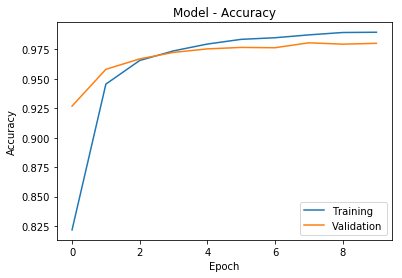

In [57]:
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

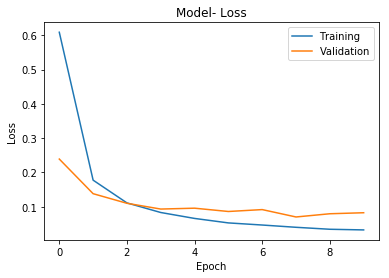

In [58]:
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'],loc='upper right')
plt.show()